In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
cars = pd.read_csv('E:\MRM\Research_Task_5\CarPrice_Assignment.csv')

In [4]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


Splitting Company Name and Car Name

In [6]:
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Fixing values (changing misspelled values, expanding short forms)

In [7]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [8]:
cars.CompanyName = cars.CompanyName.str.lower()

def replace_name(a,b):
    cars.CompanyName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [9]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

Adding New Features

In [10]:
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

Assigning Companies to Bins (segregation of companies based on avg prices)

In [11]:
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='CompanyName')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450,19.80,Medium


Bivariate Analysis

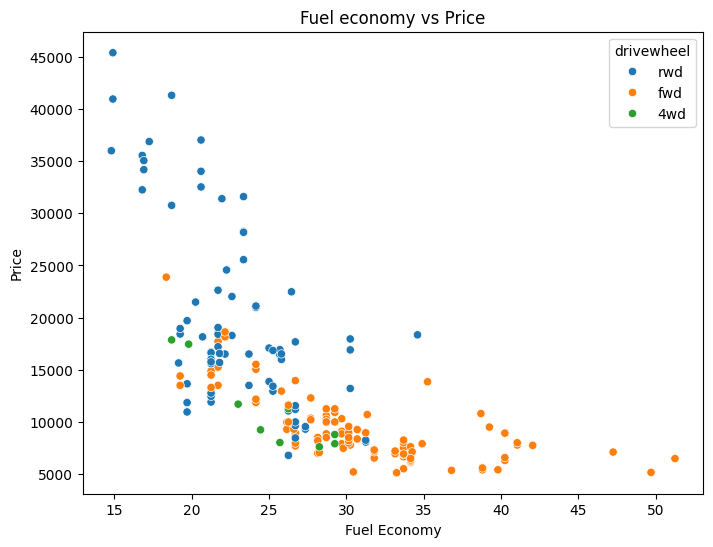

<Figure size 640x480 with 0 Axes>

In [12]:
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x=cars['fueleconomy'],y=cars['price'],hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()


As fuel Economy Increases, Price Decreases 

<Figure size 2500x600 with 0 Axes>

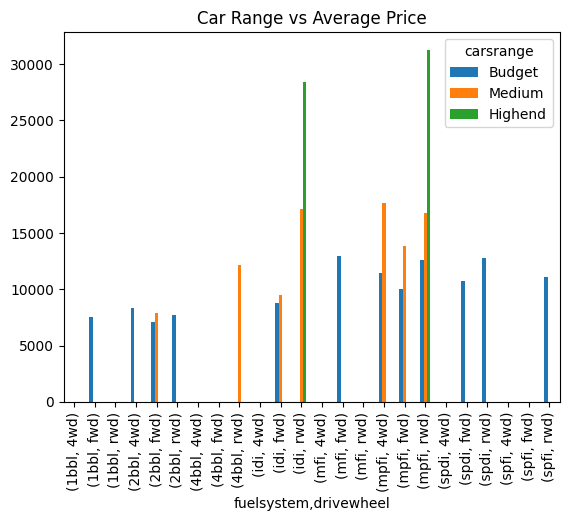

In [13]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

Highend cars prefer rwd,idi or mpi fuel system

List of Significant features 

In [14]:
cars_lr = cars[['fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower', 
                    'fueleconomy', 'carlength','carwidth', 'carsrange', 'price']]
cars_lr.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange,price
0,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium,13495
1,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium,16500
2,gas,std,hatchback,rwd,94.5,2823,ohcv,six,152,2.68,154,22.15,171.2,65.5,Medium,16500
3,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium,13950
4,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium,17450


In [15]:
cars_lr_data = cars_lr.values
Y = cars_lr_data[:, -1].reshape(cars_lr_data.shape[0], 1)
X = cars_lr_data[:, :-1]
print("Shape of X_cars :", X.shape)
print("Shape of Y_cars :", Y.shape)

Shape of X_cars : (205, 15)
Shape of Y_cars : (205, 1)


We have 205 cars in our dataset and each car has 15 features

Converting Numeric Columns to Float (Preprocess Categorical and Numerical Data)

In [16]:
data = [
    ['gas', 'std', 'convertible', 'rwd', 88.6, 2548, 'dohc', 'four', 130, 3.47, 111, 23.70, 168.8, 64.1, 'Medium', 13495],
    ['gas', 'std', 'convertible', 'rwd', 88.6, 2548, 'dohc', 'four', 130, 3.47, 111, 23.70, 168.8, 64.1, 'Medium', 16500],
    ['gas', 'std', 'hatchback', 'rwd', 94.5, 2823, 'ohcv', 'six', 152, 2.68, 154, 22.15, 171.2, 65.5, 'Medium', 16500],
    ['gas', 'std', 'sedan', 'fwd', 99.8, 2337, 'ohc', 'four', 109, 3.19, 102, 26.70, 176.6, 66.2, 'Medium', 13950],
    ['gas', 'std', 'sedan', '4wd', 99.4, 2824, 'ohc', 'five', 136, 3.19, 115, 19.80, 176.6, 66.4, 'Medium', 17450]
]

# Create a DataFrame
df = pd.DataFrame(data, columns=[
    'fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'curbweight',
    'enginetype', 'cylindernumber', 'enginesize', 'boreratio', 'horsepower',
    'fueleconomy', 'carlength', 'carwidth', 'carsrange', 'price'
])

# Convert numerical columns to float
df[['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
    'fueleconomy', 'carlength', 'carwidth', 'price']] = df[[
    'wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower',
    'fueleconomy', 'carlength', 'carwidth', 'price']].astype(float)

# One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'carbody',
                                         'drivewheel', 'enginetype', 'cylindernumber', 'carsrange'], drop_first=True)

X_processed = df_encoded.values

print("Processed X array:\n", X_processed)

Processed X array:
 [[88.6 2548.0 130.0 3.47 111.0 23.7 168.8 64.1 13495.0 False False False
  True False False True False]
 [88.6 2548.0 130.0 3.47 111.0 23.7 168.8 64.1 16500.0 False False False
  True False False True False]
 [94.5 2823.0 152.0 2.68 154.0 22.15 171.2 65.5 16500.0 True False False
  True False True False True]
 [99.8 2337.0 109.0 3.19 102.0 26.7 176.6 66.2 13950.0 False True True
  False True False True False]
 [99.4 2824.0 136.0 3.19 115.0 19.8 176.6 66.4 17450.0 False True False
  False True False False False]]


Feature Scaling (Mean Normalization and Z score Standardization)

In [69]:
# Given numerical data for X (features)
X_processed = np.array([
    [88.6, 2548.0, 130.0, 3.47, 111.0, 23.7, 168.8, 64.1, 13495.0],
    [88.6, 2548.0, 130.0, 3.47, 111.0, 23.7, 168.8, 64.1, 16500.0],
    [94.5, 2823.0, 152.0, 2.68, 154.0, 22.15, 171.2, 65.5, 16500.0],
    [99.8, 2337.0, 109.0, 3.19, 102.0, 26.7, 176.6, 66.2, 13950.0],
    [99.4, 2824.0, 136.0, 3.19, 115.0, 19.8, 176.6, 66.4, 17450.0]
])

Y = X_processed[:, -1].reshape(-1, 1)
X_processed = X_processed[:, :-1]

# Mean normalization for X_processed
mean = np.mean(X_processed, axis=0)
range_ = np.ptp(X_processed, axis=0)  
X_normalized = (X_processed - mean) / range_

# Z score standardization for Y
Y_mean = Y.mean()
Y_std = Y.std()
Y_standarized = (Y - Y_mean) / Y_std

# Check the shape of X_normalized and Y_normalized
print("Shape of X_normalized:", X_normalized.shape)
print("Shape of Y_standarized:", Y_standarized.shape)

Shape of X_normalized: (5, 8)
Shape of Y_standarized: (5, 1)


In [70]:
print (X_normalized)
print (Y_standarized)

[[-0.49821429 -0.13963039 -0.03255814  0.34177215 -0.14615385  0.07101449
  -0.46153846 -0.50434783]
 [-0.49821429 -0.13963039 -0.03255814  0.34177215 -0.14615385  0.07101449
  -0.46153846 -0.50434783]
 [ 0.02857143  0.42505133  0.47906977 -0.65822785  0.68076923 -0.15362319
  -0.15384615  0.10434783]
 [ 0.50178571 -0.57289528 -0.52093023 -0.01265823 -0.31923077  0.5057971
   0.53846154  0.40869565]
 [ 0.46607143  0.42710472  0.10697674 -0.01265823 -0.06923077 -0.4942029
   0.53846154  0.49565217]]
[[-1.33448233]
 [ 0.58975922]
 [ 0.58975922]
 [-1.04312462]
 [ 1.1980885 ]]


Regression Model

In [29]:
def model(X, Y, learning_rate, iteration):
    theta = np.zeros((X.shape[1], 1))
    Y = np.array(Y).reshape(-1, 1)
    X = np.array(X)
    m = Y.size
    cost_list = []
    for i in range(iteration):
        y_pred = np.dot(X, theta)
        cost = (1/(2*m))*np.sum(np.square(y_pred - Y))
        d_theta = (1/m)*np.dot(X.T, y_pred - Y)
        theta = theta - learning_rate*d_theta
        cost_list.append(cost)

        if(i%(iteration/10) == 0):
            print("Cost at iteration", i, "is:", cost)
    return theta, cost_list

In [71]:
iteration = 50
learning_rate = 3
theta, cost_list = model(X_normalized, Y_standarized, learning_rate, iteration)

Cost at iteration 0 is: 0.5
Cost at iteration 5 is: 0.19512354977668522
Cost at iteration 10 is: 0.18682771316949998
Cost at iteration 15 is: 0.18544669908418068
Cost at iteration 20 is: 0.18519288737203132
Cost at iteration 25 is: 0.1851459383343733
Cost at iteration 30 is: 0.18513725038021933
Cost at iteration 35 is: 0.1851356426271843
Cost at iteration 40 is: 0.18513534510329482
Cost at iteration 45 is: 0.1851352900447929


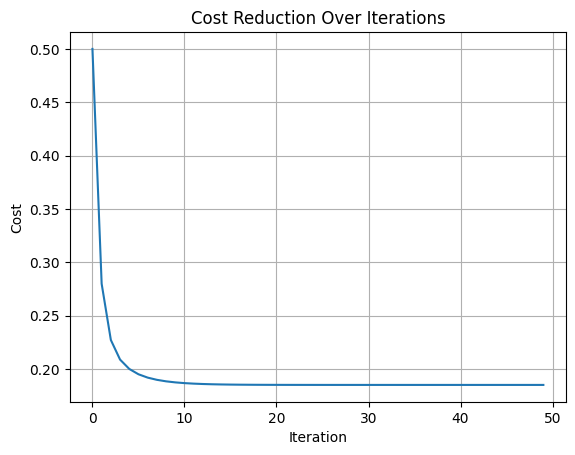

In [62]:
plt.plot(cost_list)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Reduction Over Iterations')
plt.grid()
plt.show()

Comparing Predicted and Actual Values

In [74]:
def predict(X, theta):
    return np.dot(X, theta)
y_pred_standarized = predict(X_normalized, theta)
Y_mean = np.mean(Y)
Y_std = np.std(Y)
y_pred = y_pred_standarized * Y_std + Y_mean

In [75]:
print("\nSample of Predicted vs Actual Prices:")
for i in range(min(10, len(y_pred))):
    print(f"Predicted: ${y_pred[i][0]:.2f}, Actual: ${Y[i][0]:.2f}")


Sample of Predicted vs Actual Prices:
Predicted: $14997.63, Actual: $13495.00
Predicted: $14997.63, Actual: $16500.00
Predicted: $16499.97, Actual: $16500.00
Predicted: $13949.91, Actual: $13950.00
Predicted: $17449.88, Actual: $17450.00
